# Simulate a double pendulum system

Refs: 
- https://tutorials.sciml.ai/html/models/01-classical_physics.html
- https://mathematica.stackexchange.com/questions/40122/help-to-plot-poincar%C3%A9-section-for-double-pendulum
- https://underactuated.mit.edu/multibody.html#section1
- https://www.youtube.com/watch?v=tc2ah-KnDXw (Equations of Motion for the Double Pendulum, "Good Vibrations with Freeball").

In this notebook, I'll be deriving the equations of motion of a double pendulum. We will then map it to a multivariate first-order system, discretize the dynamics and simulate the evolution.

![](figures/simple_double_pend.svg)

In [12]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
IJulia.clear_output();

In [13]:
using DifferentialEquations
using Plots
default(label="", grid=false, margin=10Plots.pt)

## Lagrangian mechanics

Lagrange's formula, $L = T - V$ (kinetic energy minus potential energy), will give us a differential equation for each angle. 

$$\begin{align} 
(m_1 + m_2)l_1\ddot{\theta}_1 + m_2 l_2 \ddot{\theta}_2 \cos(\theta_1 - \theta_2) + m_2 l_2 \dot{\theta}_2^2 \sin(\theta_1 - \theta_2) + (m_1 + m_2)G \sin(\theta_1) &= 0 \\
m_2 l_2 \ddot{\theta}_2 + m_2 l_1 \ddot{\theta}_1 \cos(\theta_1 - \theta_2) - m_2 l_1 \dot{\theta}_1^2 \sin(\theta_1 - \theta_2) + m_2 G \sin(\theta_2) &= 0
\end{align}$$

## DifferentialEquations solver

In [18]:
# Constants and setup
const g = 9.81
const m₁, m₂, L₁, L₂ = 1, 2, 1, 2
initial = [0, π/3, 0, 3pi/5]
tspan = (0.,50.)

# Convenience function for transforming from polar to Cartesian coordinates
function polar2cart(sol;dt=0.02,l1=L₁,l2=L₂,vars=(2,4))
    u = sol.t[1]:dt:sol.t[end]

    p1 = l1*map(x->x[vars[1]], sol.(u))
    p2 = l2*map(y->y[vars[2]], sol.(u))

    x1 = l1*sin.(p1)
    y1 = l1*-cos.(p1)
    (u, (x1 + l2*sin.(p2),
     y1 - l2*cos.(p2)))
end

# Define the Problem
function double_pendulum(xdot,x,p,t)
    xdot[1]=x[2]
    xdot[2]=-((g*(2*m₁+m₂)*sin(x[1])+m₂*(g*sin(x[1]-2*x[3])+2*(L₂*x[4]^2+L₁*x[2]^2*cos(x[1]-x[3]))*sin(x[1]-x[3])))/(2*L₁*(m₁+m₂-m₂*cos(x[1]-x[3])^2)))
    xdot[3]=x[4]
    xdot[4]=(((m₁+m₂)*(L₁*x[2]^2+g*cos(x[1]))+L₂*m₂*x[4]^2*cos(x[1]-x[3]))*sin(x[1]-x[3]))/(L₂*(m₁+m₂-m₂*cos(x[1]-x[3])^2))
end

# Pass to Solvers
double_pendulum_problem = ODEProblem(double_pendulum, initial, tspan)
sol = solve(double_pendulum_problem, Vern7(), dt=0.05);

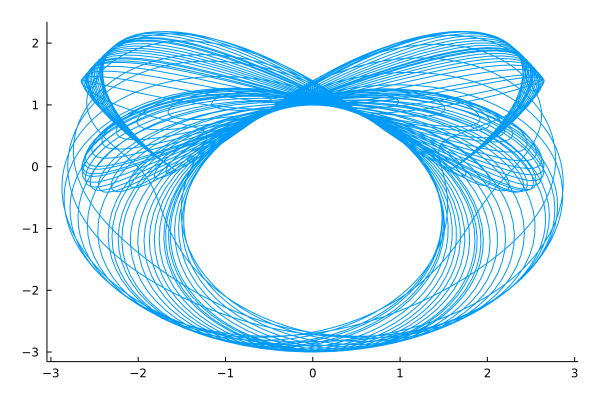

In [19]:
# Obtain coordinates in Cartesian Geometry
ts, ps = polar2cart(sol, l1=L₁, l2=L₂, dt=0.01)
plot(ps...)

## Manual simulation

In [4]:
# Dynamical parameters
m1 = 1 # kg
m2 = 1 # kg
l1 = 1 # m
l2 = 1 # m
G = 9.81 # N or kg*m / s^2

# Populate dictionary
sysparams = Dict()
sysparams[:m1] = m1
sysparams[:m2] = m2
sysparams[:l1] = l1
sysparams[:l2] = l2;

In [ ]:
function dpendulum!(dz,z,params,t; G=9.81)
      
    # States
    θ1,θ2,dθ1,dθ2 = z
  
    # Extract parameters
    m1,m2,l1,l2 = params
    

    dz[1] = dx = σ*(y-x)

    dz[2] = dy = x*(ρ-z) - y

    dz[3] = dz = x*y - β*z
    
    dz[4] = 
    
end

In [9]:
function parameterized_lorenz!(du,u,p,t)
  x,y,z = u
  σ,ρ,β = p
  du[1] = dx = σ*(y-x)
  du[2] = dy = x*(ρ-z) - y
  du[3] = dz = x*y - β*z
end

parameterized_lorenz! (generic function with 1 method)

In [10]:
u0 = [1.0,0.0,0.0]
tspan = (0.0,1.0)
p = [10.0,28.0,8/3]
prob = ODEProblem(parameterized_lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 28-element Vector{Float64}:
 0.0
 3.5678604836301404e-5
 0.0003924646531993154
 0.0032624087100077666
 0.009058076582749423
 0.016956470605311864
 0.027689959227781235
 0.04185635103821218
 0.060240410627700816
 0.0836854113984534
 0.11336499269451543
 0.14862181409827
 0.18703978025370946
 ⋮
 0.37221158152511746
 0.4201373199451134
 0.4637204183034679
 0.504946073924883
 0.5570623245742057
 0.6068388057939043
 0.669020447362476
 0.7276641343167435
 0.7988542865022868
 0.8763208592325533
 0.9661629617040817
 1.0
u: 28-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.0010461625397616113]
 [0.8800455796215916, 0.4

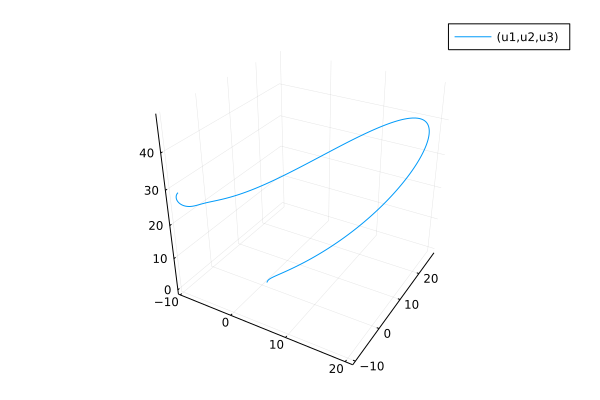

In [11]:
plot(sol,vars=(1,2,3))